In [81]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

In [96]:
df = pd.read_csv('50_Startups.csv')
df.columns
df.corr()
df




,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [97]:
for i in range(0,4): #standardization of all variables
  df.iloc[:,i] =(df.iloc[:,i]-df.iloc[:,i].mean())/(df.iloc[:,i].var())**0.5


In [107]:
print('here we can see the correlation between variables')
df.corr()



,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.197824,0.669662,0.977709
Administration,0.197824,1.000000,-0.130478,0.137055
Marketing Spend,0.669662,-0.130478,1.000000,0.693929
Profit,0.977709,0.137055,0.693929,1.000000


<AxesSubplot:>

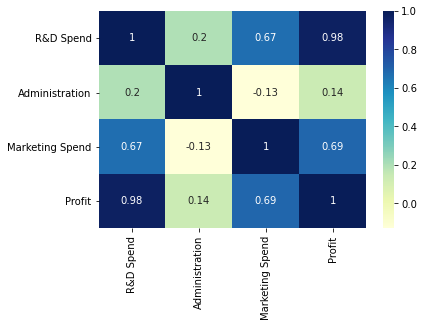

In [110]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [100]:
#converting into orthogonal basis
dff = []
i = 0
while i <3:
    b = []
    b = df.iloc[:,i].values
    dff.append(b)
    i+=1
orth = dff
len(dff)
for i in range(0, len(dff)):
     
     for j in range(0 , i):
        c = [0]*47
        c = c + orth[j]*np.dot(orth[j],orth[i])/np.dot(orth[j],orth[j])#3 orthogonal vectors
        orth[i] = orth[i] - c
orth = np.array(orth)    
for i in range(0, len(orth)):
   orth[i] = orth[i]/(np.dot(orth[i],orth[i]))**0.5 # changing orthogonal vectors to unit basis vectors
da = pd.DataFrame(orth.T)
round(da.corr(),16) # correlation between orthogonal vectors



,0,1,2
0,1.0,0.0,-0.0
1,0.0,1.0,-0.0
2,-0.0,-0.0,1.0


In [101]:
arr = []
for i in range(0,3):
    ar = [0]*47
    for j in range(0,3):
        ar = ar + orth[i]*np.dot(orth[i],dff[j]) #arr reperesents projection of all vectors along 3 orthogonal vectors
    arr.append(ar)
arr = np.array(arr)
#print(arr)
print('projecton of 3 independent variables along 3 orthogonal vector\n')

arr = arr.T
arr #projection of all variables alnog 3 orthogonal vectors
#now we need to calculate projection of profits along 3 orthogonal basis vecotrs



projecton of 3 independent variables along 3 orthogonal vector



array([[ 2.01075501e+00,  1.32720509e-01,  8.47577495e-01],
       [ 1.94711333e+00,  6.83262775e-01,  7.98479079e-01],
       [ 1.73533239e+00, -1.14105986e+00,  1.28452425e-01],
       [ 1.52556582e+00, -4.48426739e-01,  2.43478682e-01],
       [ 1.47317518e+00, -1.45157067e+00, -1.43995799e-01],
       [ 1.23654704e+00, -1.09183122e+00,  8.41677990e-02],
       [ 1.29988941e+00,  6.56051901e-01, -1.52378464e+00],
       [ 1.20003039e+00,  6.13806916e-01,  2.36539524e-01],
       [ 9.74384973e-01,  7.76918565e-01,  3.25690485e-01],
       [ 1.03897173e+00, -7.23414052e-01, -1.85789470e-01],
       [ 5.43489548e-01, -5.54251818e-01, -4.66720535e-01],
       [ 5.14782677e-01, -1.24715953e+00, -4.58208491e-01],
       [ 3.57310067e-01,  1.03992527e-01,  1.78308549e-02],
       [ 3.14025864e-01,  4.16260848e-01,  1.56832155e-01],
       [ 9.60523740e-01,  1.07050356e+00, -6.36137539e-02],
       [ 8.35168722e-01, -1.65285261e-01, -2.72110277e-01],
       [-9.31223904e-03, -3.60948976e-02

In [102]:
profit = df.loc[:,'Profit'].values
ar =[0]*3
for i in range(0,3):
    ar[i] = np.dot(orth[i],profit)
print('projection of profits along 3 orthogonal vectors')
print(ar) 


projection of profits along 3 orthogonal vectors
[6.631147632731856, -0.3899558272596738, 0.23280305802802714]


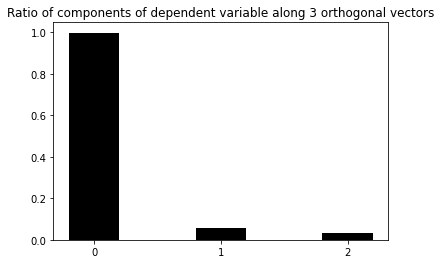

In [112]:
tick = np.arange(0,len(ar),1)
for i in range(0,len(ar)):
    plt.bar(i, (np.dot(ar[i],ar[i])**.5/(ar[0]**2 + ar[1]**2 + ar[2]**2  )**.5), color ='black',width = .4)
    plt.xticks(tick)
    plt.title('Ratio of components of dependent variable along 3 orthogonal vectors')

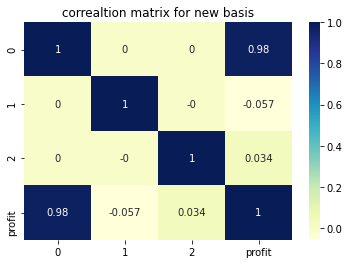

In [189]:
arr = pd.DataFrame(arr)
arr['profit'] = df.loc[:,'Profit']
sb.heatmap(round(arr.corr(),16), cmap="YlGnBu", annot=True)
plt.title('correaltion matrix for new basis')
plt.show()






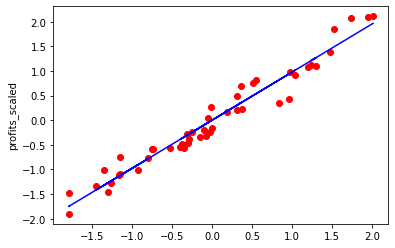

In [190]:
lm_list= []
slope_list = []
slope = 0
lm = []
for i in range(0,3):
    slope = 0
    lm = []
    slope = arr.corr().loc[i,'profit']  
    lm = arr[i].values*slope
    lm_list.append(lm)
    slope_list.append(slope)
sum = []
lm_list = np.array(lm_list)
lm_list = lm_list.T
sum = []
for i in range(0,47):
    s= 0
    for j in range(0,1):
     s = s+ lm_list[i,j]
    sum.append(s)
plt.plot(arr.iloc[:,0],sum,color = 'blue')
plt.scatter(arr.iloc[:,0],arr.iloc[:,3],color = 'red')
plt.ylabel('profits_scaled')
plt.show()

    
    